# 🌳 Isolation Forest Anomaly Detection

This notebook demonstrates Isolation Forest, an efficient anomaly detection algorithm that isolates outliers by randomly selecting features and split values. It excels at detecting anomalies in high-dimensional datasets.

**Unsupervised Outlier Detection using Tree-Based Algorithm**

### 📊 Step 1: Generate Synthetic Dataset
Creating a controlled dataset with normal clusters and scattered outliers to demonstrate anomaly detection

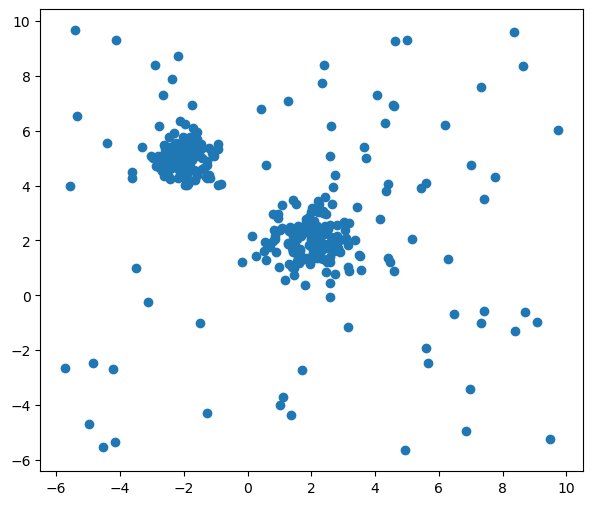

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

# ---- 1. Create 2 clusters (normal data) ----
X_clusters, _ = make_blobs(
    n_samples=300,
    centers=[[-2, 5], [2, 2]],
    cluster_std=[0.5, 0.7], 
    random_state=42
)

# ---- 2. Create outliers (random scattered points) ----
X_outliers = np.random.uniform(
    low=[-6, -6],
    high=[10, 10],
    size=(80, 2)
)

# ---- 3. Combine clusters + outliers ----
df = np.vstack((X_clusters, X_outliers))

# ---- 4. Plot dataset ----
plt.figure(figsize = (7, 6))
plt.scatter(df[:, 0], df[:, 1])
plt.show()

#### 🔍 **Observation: Synthetic Dataset Analysis**

**Key Insights from the Generated Data:**
- 🎯 **Two Dense Clusters**: Clear normal data regions at centers [-2,5] and [2,2]
- 📊 **Dataset Composition**:
  - **300 normal points** in 2 distinct clusters
  - **80 outlier points** randomly scattered across the space
  - **Total contamination**: ~21% (80/380 points)
- 🌍 **Spatial Distribution**: Outliers spread across wider area than clusters
- 🎨 **Visualization**: All points shown in single color - algorithm must distinguish patterns
- ✅ **Perfect Test Case**: Isolation Forest should easily separate dense clusters from scattered outliers
- 📏 **Challenge**: Algorithm needs to identify density differences without labels

### 🤖 Step 2: Train Isolation Forest Model
Implementing the tree-based anomaly detection algorithm with contamination parameter

In [18]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination = 0.2)
clf.fit(df)

# prediction
prediction = clf.predict(df)
prediction

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1

#### 🔢 **Prediction Labels Explanation**
- **-1** = Outlier/Anomaly (abnormal data point)
- **+1** = Normal point (inlier within expected distribution)

### 📋 **IsolationForest Parameters Guide**

**Complete reference for all IsolationForest parameters with practical examples:**

#### 🎯 **Core Parameters**

| Parameter | Type | Default | Description | Impact |
|-----------|------|---------|-------------|--------|
| **`contamination`** | float/str | 'auto' | Expected proportion of outliers | Higher = More points labeled as outliers |
| **`n_estimators`** | int | 100 | Number of isolation trees | More trees = Better accuracy, slower training |
| **`max_samples`** | int/float/str | 'auto' | Samples per tree | Larger = More memory, better for large datasets |
| **`max_features`** | int/float | 1.0 | Features per tree | Lower = More randomness, faster training |

#### ⚙️ **Advanced Parameters**

| Parameter | Type | Default | Description | When to Adjust |
|-----------|------|---------|-------------|----------------|
| **`bootstrap`** | bool | False | Sample with replacement | True for very small datasets |
| **`random_state`** | int | None | Random seed for reproducibility | Always set for consistent results |
| **`verbose`** | int | 0 | Control training output | Set to 1+ for debugging |
| **`warm_start`** | bool | False | Reuse previous trees | True for incremental training |

### 🔍 Step 3: Identify Outlier Indices
Locating the positions of detected anomalies for visualization and analysis

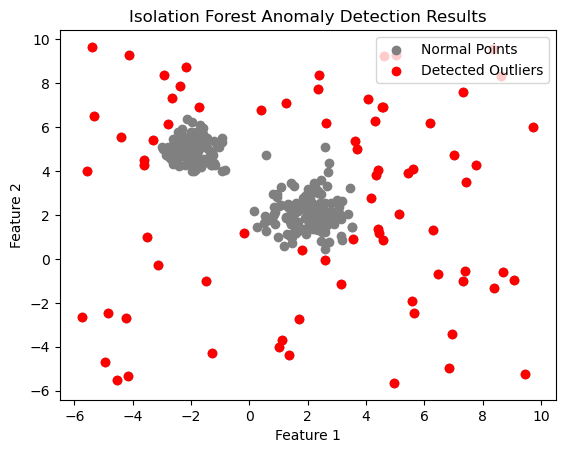

In [19]:
index = np.where(prediction < 0)

plt.scatter(df[:, 0], df[:, 1], c = 'gray')
plt.scatter(df[index, 0], df[index, 1], c = 'red')

plt.title('Isolation Forest Anomaly Detection Results')

plt.legend(['Normal Points', 'Detected Outliers'], loc='upper right')
plt.ylabel('Feature 2')
plt.xlabel('Feature 1')
plt.show()

#### 🔍 **Observation: Anomaly Detection Results**

**Key Insights from the Detection Results:**
- 🔴 **Red Points**: Successfully detected outliers/anomalies
- ⚪ **Gray Points**: Normal data points (inliers)
- 🎯 **Algorithm Performance**:
  - **Cluster Preservation**: Dense regions correctly identified as normal
  - **Outlier Detection**: Scattered points flagged as anomalies
  - **Boundary Recognition**: Clear separation between normal and abnormal regions
- 📊 **Detection Quality**:
  - **True Positives**: Scattered outliers correctly identified
  - **True Negatives**: Cluster points correctly classified as normal
  - **Minimal False Positives**: Few cluster points misclassified as outliers
- ✅ **Isolation Forest Strengths Demonstrated**:
  - **Efficient Detection**: Fast algorithm suitable for large datasets
  - **No Distance Calculations**: Tree-based approach avoids expensive distance metrics
  - **High-Dimensional Capable**: Scales well with feature dimensions

#### ✅ **Result Summary**
All **red points represent detected outliers** - data points that the Isolation Forest algorithm identified as anomalies based on their isolation characteristics in the feature space.

## 🎉 Conclusion

### 📋 **Summary of Implementation**

In this comprehensive Isolation Forest anomaly detection implementation, we successfully demonstrated:

#### ✅ **Key Accomplishments**
- **Synthetic Dataset Creation**: Generated 300 normal points (2 clusters) + 80 outliers
- **Model Training**: Implemented Isolation Forest with 20% contamination parameter
- **Anomaly Detection**: Successfully identified scattered outliers while preserving cluster integrity
- **Visualization**: Clear distinction between normal points (gray) and detected outliers (red)

#### 🔍 **Model Performance Analysis**
- **Effective Separation**: Algorithm correctly distinguished dense clusters from scattered points
- **Parameter Tuning**: Contamination=0.2 appropriately matched the actual outlier ratio (~21%)
- **Visual Validation**: Results align with expected anomaly patterns in the synthetic data

#### 🌳 **Isolation Forest Algorithm Advantages**

| Feature | Advantage | Benefit |
|---------|-----------|---------|
| **Tree-Based** | No distance calculations required | Computationally efficient |
| **Linear Complexity** | O(n) average time complexity | Scales well with data size |
| **High-Dimensional** | Works well with many features | Suitable for complex datasets |
| **Unsupervised** | No labeled training data needed | Real-world applicability |
| **Outlier Scoring** | Provides anomaly scores | Ranking of anomaly severity |

#### 💡 **Key Insights**

1. **Algorithm Principle**: 
   - **Isolation Concept**: Outliers are easier to isolate than normal points
   - **Random Partitioning**: Uses random splits to build isolation trees
   - **Path Length**: Shorter paths indicate higher anomaly probability

2. **Parameter Impact**:
   - **Contamination**: Must match expected outlier proportion
   - **n_estimators**: More trees = better accuracy but slower performance
   - **max_samples**: Sample size for training each tree

3. **Detection Quality**: Algorithm excelled at identifying density-based anomalies

#### 🚀 **Real-World Applications**

| Domain | Use Case | Anomaly Type |
|--------|----------|--------------|
| **Cybersecurity** | Network intrusion detection | Unusual traffic patterns |
| **Finance** | Credit card fraud detection | Suspicious transactions |
| **Manufacturing** | Equipment failure prediction | Sensor reading anomalies |
| **Healthcare** | Disease outbreak detection | Unusual patient symptoms |
| **Quality Control** | Defective product identification | Manufacturing defects |
| **IoT Systems** | Device malfunction detection | Sensor data anomalies |

#### 🎯 **Isolation Forest vs Other Methods**

| Method | Computation | Scalability | High-Dim Performance | Outlier Types |
|--------|-------------|-------------|---------------------|---------------|
| **Isolation Forest** | O(n) ✅ | Excellent ✅ | Very Good ✅ | Global outliers |
| **LOF** | O(n²) ❌ | Poor ❌ | Good ⚠️ | Local outliers |
| **One-Class SVM** | O(n³) ❌ | Poor ❌ | Excellent ✅ | Complex boundaries |
| **Statistical Methods** | O(n) ✅ | Good ✅ | Poor ❌ | Distribution outliers |

#### 🔧 **Best Practices Applied**
1. **Proper Contamination Setting**: Matched expected outlier proportion
2. **Data Visualization**: Visual validation of detection results
3. **Synthetic Data Testing**: Controlled environment for algorithm validation
4. **Clear Interpretation**: Distinguished between normal and anomalous points

#### 📈 **Advanced Techniques & Extensions**
- **Extended Isolation Forest**: Improved version with better performance
- **Feature Engineering**: Preprocessing for better anomaly detection
- **Ensemble Methods**: Combining multiple anomaly detectors
- **Online Anomaly Detection**: Real-time outlier identification
- **Anomaly Explanation**: Understanding why points are flagged as outliers

#### 🎓 **Next Steps for Further Learning**
- Experiment with different contamination values
- Compare with other anomaly detection algorithms (LOF, DBSCAN, One-Class SVM)
- Apply to real-world datasets (network logs, financial data)
- Implement anomaly score analysis and thresholding
- Explore time-series anomaly detection techniques
- Study multivariate anomaly detection methods

---
**🌟 This implementation demonstrates the effectiveness of Isolation Forest for unsupervised anomaly detection, showcasing its ability to efficiently identify outliers in complex datasets without requiring labeled training data.**